In [2]:
## Importing needed packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data

from astropy.wcs import WCS
from astropy import wcs
import sys
from astropy.visualization import make_lupton_rgb
from sklearn import preprocessing #only works for dimensions <=2

#For plotting Gaussian
from scipy.optimize import curve_fit
from astropy import modeling
from scipy.stats import norm
import math
import seaborn as sns
from scipy.signal import find_peaks
import scipy.stats as stats
import scipy.stats

In [3]:
location = "/Users/RuheeJanmohamed/Desktop/Data/co_zero_north.fits"

hdul = fits.open(location)

hdu_zero_north = hdul[0]

co_zero_north = hdu_zero_north.data

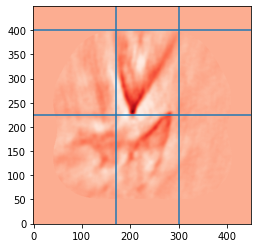

In [4]:
plt.imshow(co_zero_north,cmap='Reds',origin='lower')
plt.axvline(170) 
plt.axvline(300) 
plt.axhline(225)
plt.axhline(400)

[4.57898984e+03 1.84116238e+02 4.14056643e+00 4.40920865e+03
 2.46287160e+02 8.78177033e+00]


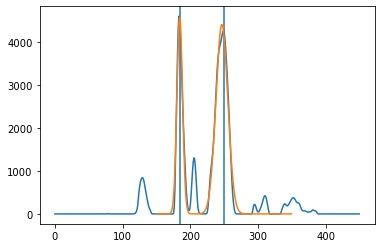

In [5]:
#Fitting Gausian to one curve first

cut = co_zero_north[300:310,:] 
cut[cut<0]=0
avg_cut = np.mean(cut,axis=0)

plt.plot(range(450),avg_cut)


#Defining Double Gaussian

def Double_Gauss(x,amp_1,mean_1,sigma_1,amp_2,mean_2,sigma_2):
    f = (amp_1 * np.exp(-(x - mean_1)**2/(2*sigma_1**2))+ amp_2 * np.exp(-(x-mean_2)**2/(2*sigma_2**2)))
    return f

xdata=np.arange(150,350)
ydata=avg_cut[150:350]

plt.axvline(185) 
plt.axvline(250)
p0 = (np.max(ydata),xdata[np.argmax(ydata)],5,np.max(ydata),xdata[np.argmax(ydata)]+15,5)


p_opt,p_cov = curve_fit(Double_Gauss,xdata,ydata,p0)
plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))
print(p_opt)




In [9]:
#ycut list
# ycut_list=[(225+(i*5),225+((i+1)*5)) for i in range(31)]

# print(ycut_list)

ycut_list = [(380-((i+1)*5),380-(i*5)) for i in range(31)] #starting at the widest part and work towards star

print(ycut_list)

[(375, 380), (370, 375), (365, 370), (360, 365), (355, 360), (350, 355), (345, 350), (340, 345), (335, 340), (330, 335), (325, 330), (320, 325), (315, 320), (310, 315), (305, 310), (300, 305), (295, 300), (290, 295), (285, 290), (280, 285), (275, 280), (270, 275), (265, 270), (260, 265), (255, 260), (250, 255), (245, 250), (240, 245), (235, 240), (230, 235), (225, 230)]


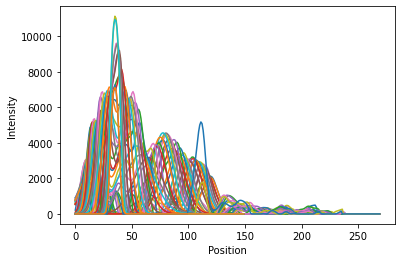

In [8]:
Model_Values = open("North(DG)_Model_Values.txt", "w")

# Model_Values.write("Left Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk_1\tfit_x_1\tfit_s_1\tfit_pk_2\tfit_x_2\tfit_s_2\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c1\tx_c2\tpk_c1\tpk_c2\n")

offset_x1 = 170 #200
offset_x2 = 440

first = 0



for ycut in ycut_list:
    cut = co_zero_north[ycut[0]:ycut[1],offset_x1:offset_x2]
    avg_cut = np.mean(cut,axis=0)
    avg_cut[avg_cut<0]=0 #doesn't change original image
    xdata=np.arange(0,150)
    idata=avg_cut[0:150] #5:120
    
    if (first < 1): #giving it intial first guess
        p0 = (np.max(idata),xdata[np.argmax(idata)],5,np.max(idata),xdata[np.argmax(idata)]-100,5)
        first =1
    else:
        p0 = p_opt #telling it to look where it was before
        
    p_opt,p_cov = curve_fit(Double_Gauss,xdata,idata,p0,maxfev=90000)
    
       
    
    plt.plot(range(270),avg_cut)
    plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut)) #,0.
    Model_Values.write("%f\t%f\t%f\t\t%f\t\t%f\t\t%f\t\t" % (p_opt[0],p_opt[1]+offset_x1,p_opt[2],p_opt[3],p_opt[4]+offset_x1,p_opt[5]))
    Model_Values.write("%f\t%f\t%f\t%f\t%f\t%f\t" % (Err[0],Err[1],Err[2],Err[3],Err[4],Err[5]))
    Model_Values.write("%f\t%f\t" % (xdata[idata==np.max(idata)]+offset_x1,xdata[np.argmax(idata)]+offset_x1))
    Model_Values.write("%f\t%f\t" % (np.max(idata),np.max(idata)))
    Model_Values.write("\n")
 

#     for slice in slice_list: #define slice to find all of the maps
#         co_slice = co_zero_north #the 2d slice i've already made
#         cut = co_slice[ycut[0]:ycut[1],offset_x1:offset_x2] #image cube
#         avg_cut = np.mean(cut,axis=0)
#         avg_cut[avg_cut<0]=0 #doesn't change original image
#         xdata=np.arange(0,150)
#         idata=avg_cut[0:150] #5:120
    
#         p0 = p_opt #telling it to look where it was before
        
#         p_opt,p_cov = curve_fit(Double_Gauss,xdata,idata,p0,maxfev=90000)
    
       
    
# #       plt.plot(range(240),avg_cut)
#         plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))
    
#         Err =np.sqrt(np.diag(p_cov))
#         Model_Values.write("%f\t%f\t" % np.mean(ycut),slice)
#         Model_Values.write("%f\t%f\t%f\t\t%f\t\t%f\t\t%f\t\t" % (p_opt[0],p_opt[1]+offset_x1,p_opt[2],p_opt[3],p_opt[4]+offset_x1,p_opt[5]))
#         Model_Values.write("%f\t%f\t%f\t%f\t%f\t%f\t" % (Err[0],Err[1],Err[2],Err[3],Err[4],Err[5]))
#         Model_Values.write("%f\t%f\t" % (xdata[idata==np.max(idata)]+offset_x1,xdata[np.argmax(idata)]+15+offset_x1))
#         Model_Values.write("%f\t%f\t" % (np.max(idata),np.max(idata)))
#         Model_Values.write("\n")
#Could also read in file from data already done
    
plt.xlabel("Position")
plt.ylabel("Intensity")
Model_Values.close()



In [1045]:
# def is_even_line(line):
#     return line[0] == '1'

# with open("North(DG)_Model_Values.txt") as f:
#     iter = (line for line in f if is_even_line(line))
#     ycut_tot= np.genfromtxt(iter,skip_header = 2, unpack=True, usecols=[0])

In [1046]:
# def is_odd_line(line2):
#     return line2[0] == '3'

# with open("North(DG)_Model_Values.txt") as f2:
#     iter = (line2 for line2 in f2 if is_odd_line(line2))
#     ycut_left, xfit_left = np.genfromtxt(iter,skip_header = 2, unpack=True, usecols=[0,5])

In [1047]:
ycut_right,xfit_right = np.genfromtxt("North(DG)_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])#check these
ycut_left,xfit_left = np.genfromtxt("North(DG)_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,5])



In [1048]:
# print(ycut_left)
# print(ycut_right)
print(xfit_right)
print(xfit_left)


[286.470179 283.885869 281.387428 278.811445 276.260202 273.949542
 270.835252 267.258941 264.519719 260.408513 255.994278 252.954285
 250.107349 247.448588 245.115376 242.010412 234.579147 228.022049
 223.952121 220.5843   219.378756 219.667853 219.235529 216.580878
 213.848369 211.213948 209.230748 208.79941  207.691563 206.88664 ]
[183.984613 184.584575 183.549983 181.510095 181.329171 182.710903
 182.87328  183.10339  184.0652   183.01152  180.754622 181.216385
 182.426107 183.544691 184.580312 185.428501 186.488386 187.921836
 189.190321 191.046659 192.662176 195.084851 197.151155 198.288814
 199.829573 200.632097 201.489094 203.023698 203.05392  202.853923]


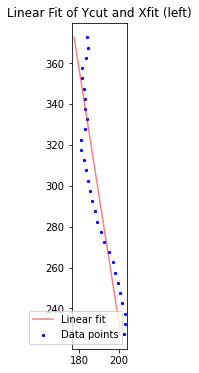

-0.1615419519021136


In [1049]:
fit = np.polyfit(ycut_left, xfit_left,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_left + intercept

fig = plt.figure(figsize=[1,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_left,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_left, ycut_left,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

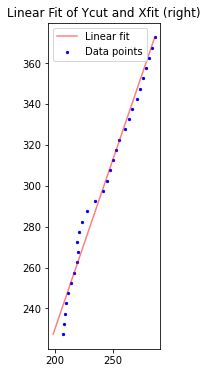

0.6068538756395994


In [1050]:
fit = np.polyfit(ycut_right, xfit_right,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_right + intercept

fig = plt.figure(figsize=[2,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_right,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_right, ycut_right,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (right)')
ax.legend()
plt.show()

print(ang_coeff)

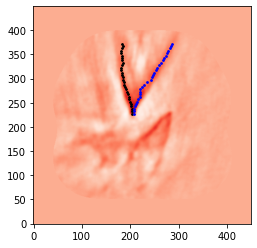

In [1051]:
plt.imshow(co_zero_north,cmap='Reds',origin='lower')
plt.scatter(xfit_left,ycut_left, s=3, c='k')
plt.scatter(xfit_right,ycut_right, s=3, c='b')

##### 